# import libs

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data collection and Processing

In [97]:
car_dataset = pd.read_csv(r'C:\Users\dell\Desktop\Data Science Diploma\Project 7. Car Price Prediction using Machine Learning with Python\archive\car data.csv')

# inspecting first 5 values of data

In [98]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
# checking the number of rows and coloumns
car_dataset.shape
#we have 301 car with 9 features

(301, 9)

In [100]:
# getting info and dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [101]:
# checking the number of missing values
car_dataset.isnull().sum()
# no missing values so we don't need to replace any rows with some values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [102]:
# checking the distribution categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [103]:
#machine learning model can not understand text probably so we need to
#convert text to numerical that Ml can understand this process called encoding

# encoding the categorical data

In [104]:
# encoding the "Fuel_Type" coloumn
#car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}} ,inplace =True)

In [105]:
# encoding the "Seller_Type" Column
#car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}} ,inplace=True)

In [106]:
# encoding the "Transmission" Column
#car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [107]:
#CL
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [108]:
transformer = ColumnTransformer(transformers=[
("tnf1",OrdinalEncoder(categories=[["Petrol","Diesel","CNG"]]),["Fuel_Type"]),
("tnf2",OrdinalEncoder(categories=[["Dealer","Individual"]]),["Seller_Type"]),
("tnf3",OrdinalEncoder(categories=[["Manual","Automatic"]]),["Transmission"])    

],remainder="passthrough")

In [109]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# splitting the data into Training and testing 

In [110]:
X = car_dataset.drop(['Car_Name','Selling_Price'] , axis=1)
Y = car_dataset['Selling_Price']


In [114]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000    Petrol      Dealer       Manual      0
1    2013           9.54       43000    Diesel      Dealer       Manual      0
2    2017           9.85        6900    Petrol      Dealer       Manual      0
3    2011           4.15        5200    Petrol      Dealer       Manual      0
4    2014           6.87       42450    Diesel      Dealer       Manual      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988    Diesel      Dealer       Manual      0
297  2015           5.90       60000    Petrol      Dealer       Manual      0
298  2009          11.00       87934    Petrol      Dealer       Manual      0
299  2017          12.50        9000    Diesel      Dealer       Manual      0
300  2016           5.90        5464    Petrol      Dealer       Manual      0

[301 rows x 7 columns]


In [88]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# splitting Training and Test 

In [190]:
    X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)
    transformer.fit_transform(X_train.head())

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0150e+03, 4.4300e+00,
        2.8282e+04, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0160e+03, 7.6000e+00,
        1.7000e+04, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0150e+03, 1.3600e+01,
        2.1780e+04, 0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0080e+03, 7.8700e-01,
        5.0000e+04, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0130e+03, 9.4000e+00,
        4.9000e+04, 0.0000e+00]])

# Model Training 
------


- Linear Regression

In [167]:
# lodaing the linear regression model
lin_reg_model = LinearRegression()
#print(transformer.fit_transform(X_train.head(1)))

In [168]:
lin_reg_model.fit(transformer.fit_transform(X_train),Y_train)

LinearRegression()

# Model Evalution

In [169]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(transformer.fit_transform(X_train))

In [170]:
# Resdual Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : " ,error_score)

R Squared Error :  0.8799451660493721


## Visualize the actual prices and predictive prices

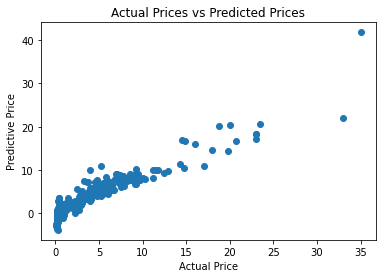

In [171]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [172]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(transformer.fit_transform(X_test))

In [173]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715022539


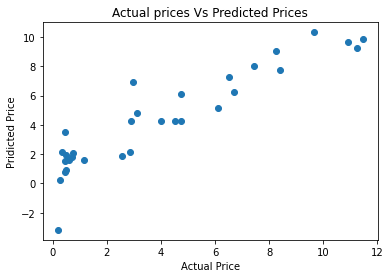

In [174]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Pridicted Price")
plt.title("Actual prices Vs Predicted Prices")
plt.show()

In [196]:
lin_reg_model.predict([[0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0150e+03, 4.4300e+00,
        2.8282e+04, 0.0000e+00]])

array([3.73088505])

In [192]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,Petrol,Dealer,Manual,0
249,2016,7.600,17000,Petrol,Dealer,Manual,0
277,2015,13.600,21780,Petrol,Dealer,Manual,0
194,2008,0.787,50000,Petrol,Individual,Manual,0
244,2013,9.400,49000,Diesel,Dealer,Manual,0


In [193]:
Y_train.head()

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
Name: Selling_Price, dtype: float64

In [195]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,Petrol,Dealer,Manual,0
249,2016,7.600,17000,Petrol,Dealer,Manual,0
277,2015,13.600,21780,Petrol,Dealer,Manual,0
194,2008,0.787,50000,Petrol,Individual,Manual,0
244,2013,9.400,49000,Diesel,Dealer,Manual,0
